In [ ]:

import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report
from keras import layers
from keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Завантаження датасету Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Перевірка форми даних
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


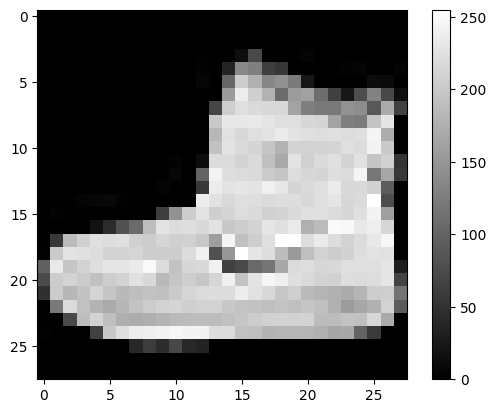

In [ ]:
# Візуалізація першого зображення з тренувального датасету
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Нормалізація значень пікселів до діапазону [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0


In [ ]:
# Зміна форми зображень для відповідності вхідному формату Conv2D
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


In [ ]:
# Розділення тренувального набору на тренувальний та валідаційний
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)

In [ ]:
# Перетворення міток у формат one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)


In [ ]:
# Перевірка форм даних після перетворення
print("Train images shape:", train_images.shape)
print("Validation images shape:", val_images.shape)
print("Test images shape:", test_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation labels shape:", val_labels.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (48000, 28, 28, 1)
Validation images shape: (12000, 28, 28, 1)
Test images shape: (10000, 28, 28, 1)
Train labels shape: (48000, 10)
Validation labels shape: (12000, 10)
Test labels shape: (10000, 10)


In [ ]:
model_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dropout(0.25),  # Додаємо Dropout
    tf.keras.layers.BatchNormalization(),  # Додаємо BatchNormalization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
# Компіляція моделі
model_conv.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_conv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 global_max_pooling2d (Glob  (None, 64)                0

In [ ]:
history = model_conv.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))

Epoch 1/15
1500/1500 [==============================] - 52s 33ms/step - loss: 0.5912 - accuracy: 0.7844 - val_loss: 0.4233 - val_accuracy: 0.8415
Epoch 2/15
1500/1500 [==============================] - 49s 33ms/step - loss: 0.4150 - accuracy: 0.8481 - val_loss: 0.3258 - val_accuracy: 0.8780
Epoch 3/15
1500/1500 [==============================] - 47s 32ms/step - loss: 0.3696 - accuracy: 0.8633 - val_loss: 0.3049 - val_accuracy: 0.8865
Epoch 4/15
1500/1500 [==============================] - 48s 32ms/step - loss: 0.3370 - accuracy: 0.8770 - val_loss: 0.2965 - val_accuracy: 0.8903
Epoch 5/15
1500/1500 [==============================] - 48s 32ms/step - loss: 0.3164 - accuracy: 0.8846 - val_loss: 0.2938 - val_accuracy: 0.8913
Epoch 6/15
1500/1500 [==============================] - 47s 31ms/step - loss: 0.3003 - accuracy: 0.8911 - val_loss: 0.3081 - val_accuracy: 0.8833
Epoch 7/15
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2849 - accuracy: 0.8951 - val_loss: 0.2724 -

In [ ]:
test_loss, test_acc = model_conv.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 0.2761 - accuracy: 0.9053 - 3s/epoch - 8ms/step


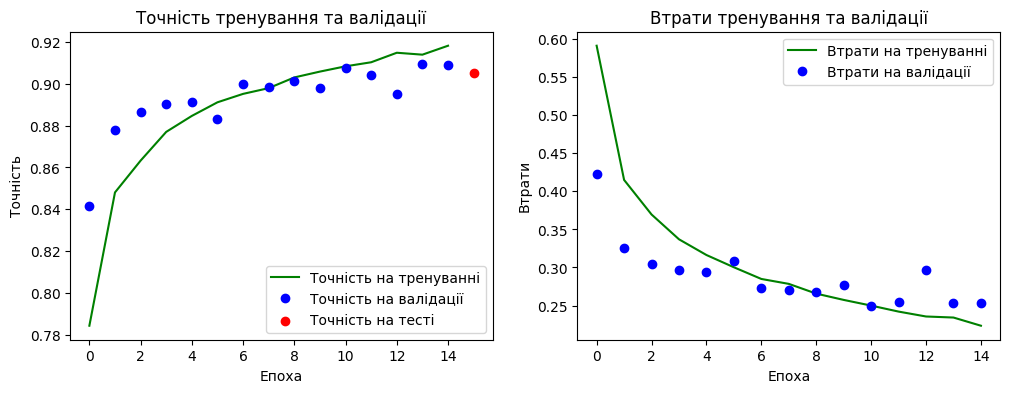

In [ ]:

# Побудова графіку точності
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], "g", label='Точність на тренуванні')
plt.plot(history.history['val_accuracy'], "bo", label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.title('Точність тренування та валідації')
plt.legend()

# Додавання тестової точності до графіку
plt.scatter(len(history.history['accuracy']), test_acc, label='Точність на тесті', color='red')
plt.legend()

# Побудова графіку втрат
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], "g", label='Втрати на тренуванні')
plt.plot(history.history['val_loss'], "bo", label='Втрати на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.title('Втрати тренування та валідації')
plt.legend()

In [ ]:

# Отримання передбачень для тестових даних
predictions = model_conv.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Отримання індексу класу для кожного зображення
true_classes = np.argmax(test_labels, axis=1)

# Генерація classification report
report = classification_report(true_classes, predicted_classes)

# Вивід результатів
print(report)

313/313 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.89      0.86      1000
           3       0.91      0.91      0.91      1000
           4       0.83      0.87      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.75      0.66      0.70      1000
           7       0.94      0.99      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.99      0.94      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.90     10000
weighted avg       0.91      0.91      0.90     10000



In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Виведення номерів і назв класів
for idx, class_name in enumerate(class_names):
    print(f'Номер: {idx}, Назва: {class_name}')

Номер: 0, Назва: T-shirt/top
Номер: 1, Назва: Trouser
Номер: 2, Назва: Pullover
Номер: 3, Назва: Dress
Номер: 4, Назва: Coat
Номер: 5, Назва: Sandal
Номер: 6, Назва: Shirt
Номер: 7, Назва: Sneaker
Номер: 8, Назва: Bag
Номер: 9, Назва: Ankle boot


1/1 [==============================] - 0s 32ms/step


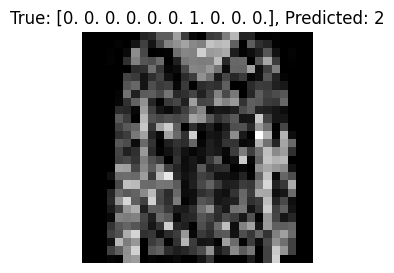

Class probabilities:
Class 0: 0.0280
Class 1: 0.0040
Class 2: 0.6285
Class 3: 0.0013
Class 4: 0.0490
Class 5: 0.0000
Class 6: 0.2762
Class 7: 0.0000
Class 8: 0.0129
Class 9: 0.0001
1/1 [==============================] - 0s 44ms/step


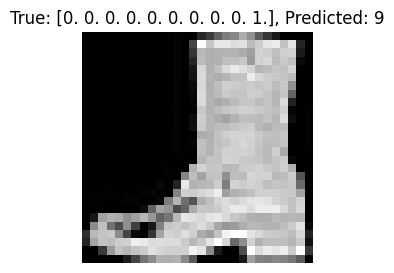

Class probabilities:
Class 0: 0.0000
Class 1: 0.0000
Class 2: 0.0000
Class 3: 0.0000
Class 4: 0.0000
Class 5: 0.0001
Class 6: 0.0000
Class 7: 0.0001
Class 8: 0.0000
Class 9: 0.9998
1/1 [==============================] - 0s 32ms/step


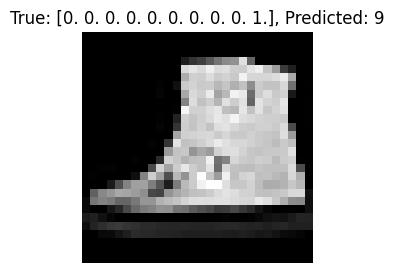

Class probabilities:
Class 0: 0.0000
Class 1: 0.0000
Class 2: 0.0000
Class 3: 0.0000
Class 4: 0.0000
Class 5: 0.0001
Class 6: 0.0000
Class 7: 0.0150
Class 8: 0.0000
Class 9: 0.9849
1/1 [==============================] - 0s 29ms/step


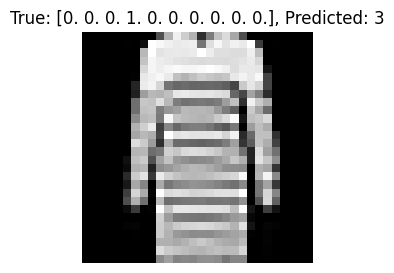

Class probabilities:
Class 0: 0.0064
Class 1: 0.0000
Class 2: 0.3738
Class 3: 0.6090
Class 4: 0.0058
Class 5: 0.0000
Class 6: 0.0050
Class 7: 0.0000
Class 8: 0.0000
Class 9: 0.0000
1/1 [==============================] - 0s 32ms/step


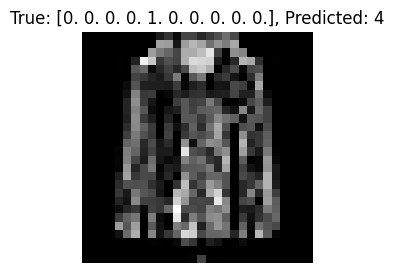

Class probabilities:
Class 0: 0.0000
Class 1: 0.0000
Class 2: 0.0244
Class 3: 0.0000
Class 4: 0.9711
Class 5: 0.0000
Class 6: 0.0044
Class 7: 0.0000
Class 8: 0.0000
Class 9: 0.0000


In [ ]:
num_images = 5
indices = np.random.choice(len(test_images), num_images, replace=False)

for idx in indices:
    image = test_images[idx]
    true_label = test_labels[idx]

    # Make predictions
    y_pred_prob = model_conv.predict(np.expand_dims(image, axis=0))
    predicted_label = np.argmax(y_pred_prob)

    plt.figure(figsize=(3, 3))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.show()

    print('Class probabilities:')
    for class_idx, prob in enumerate(y_pred_prob[0]):
        print(f'Class {class_idx}: {prob:.4f}')


In [ ]:
model_conv.save ("fashion_mnist_model_conv.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pickle

In [ ]:
# Збереження історії навчання
with open('fashion_mnist_model_conv_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
from google.colab import files

# Завантаження моделі у форматі HDF5
files.download('fashion_mnist_model_conv.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

from tensorflow.keras.models import load_model

# model_vgg16_loaded = load_model("fashion_mnist_model_VGG16.h5")
model_vgg16_loaded = load_model("/content/fashion_mnist_model_conv.h5")
model_vgg16_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 global_max_pooling2d (Glob  (None, 64)                0

In [ ]:
# # Збереження стану оптимізатора
# optimizer_state = model_conv.optimizer.get_weights()
# with open('optimizer_state_fashion_mnist_model_conv.pkl', 'wb') as f:
#     pickle.dump(optimizer_state, f)

# Або лише збереження стану оптимізатора
optimizer_state = model_conv.optimizer.variables()
with open('optimizer_state_fashion_mnist_model_conv.pkl', 'wb') as f:
    pickle.dump([v.numpy() for v in optimizer_state], f)